# Feature Extraction RGB-maps.

Although it is perfectly feasible train Neural Networks on raw pointclouds, it is also possible and even advised to extract features by-hand. This notebooks shows how to map an arbitrary pointcloud to a RGB-map. The R channel contains heights, the G channel contains densities, and the B channel contains intensities.

# Load a random pointcloud from the ETL-data.

In [1]:
# This makes sure that you got access to the cgmcore-module
import sys
sys.path.insert(0, "..")

# Retrieving the latest ETL-data-path.
from cgmcore.etldatagenerator import get_dataset_path
dataset_path = get_dataset_path("../../data/etl")
print("Using daataset-path {}.".format(dataset_path))

# Getting all PCDs.
import glob2 as glob
import os
all_pcd_paths = glob.glob(os.path.join(dataset_path, "**/*.pcd"))
print("Found {} PCD-files.".format(len(all_pcd_paths)))

# Randomly selecting one PCD-path.
import random
random_pcd_path = random.choice(all_pcd_paths)
print("Using random PCD-path {}.".format(random_pcd_path))

# Load the pointcloud from the PCD-path.
from cgmcore.utils import load_pcd_as_ndarray
pointcloud = load_pcd_as_ndarray(random_pcd_path)
print("Loaded pointcloud with shape {}.".format(pointcloud.shape))

WARNING! VTK not available. This might limit the functionality.
Using daataset-path ../../data/etl/2018_11_16_17_45_47.
Found 0 PCD-files.


IndexError: Cannot choose from an empty sequence

# Map the pointcloud to a RGB-map.

There are three relevant parameters. target_width and target_height specify the width and the heigth of the RGB-map. scale_factor on the other hand specifies how xyz-coordinates are supposed to be scaled.

In [11]:
from cgmcore.utils import pointcloud_to_rgb_map

rgb_map = pointcloud_to_rgb_map(pointcloud, target_width=128, target_height=128, scale_factor=1.0, axis="horizontal")
print("Shape of RGB-map is {}.".format(rgb_map.shape))

Shape of RGB-map is (128, 128, 3).


# Rendering the RGB-map.

This basically renders RGB, heights, densities and intensities.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


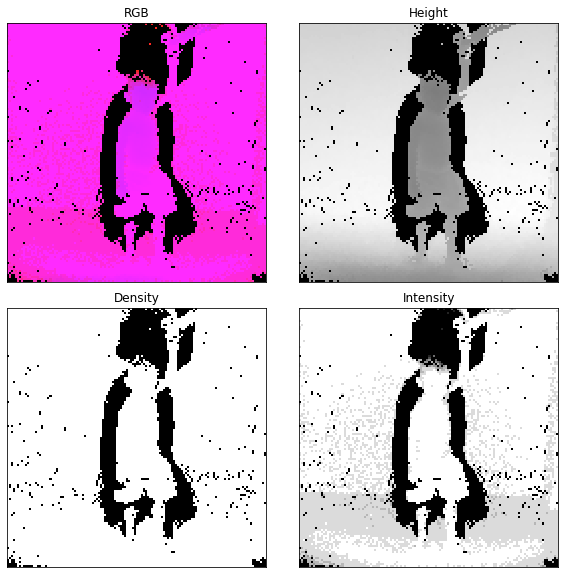

In [12]:
from cgmcore.utils import show_rgb_map

show_rgb_map(rgb_map)